In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#program to print the csv file or excelany data using pandas
csv = pd.read_csv(r'Delhi_rent.csv')
csv

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1.0,RK,Studio Apartment,Vasant Kunj,"9,999",500.0,Furnished,1 bathrooms
1,OWNER,1.0,BHK,Apartment,Sector-B Vasant Kunj,"18,500",750.0,Semi-Furnished,1 bathrooms
2,OWNER,2.0,BHK,Apartment,Saket,"13,000",1050.0,Semi-Furnished,2 bathrooms
3,OWNER,1.0,BHK,Apartment,New Ashok Nagar,"10,000",550.0,Furnished,1 bathrooms
4,OWNER,2.0,BHK,Independent Floor,laxmi nagar,"13,500",648.0,Furnished,1 bathrooms
...,...,...,...,...,...,...,...,...,...
33495,OWNER,1.0,BHK,Independent Floor,Baljeet Nagar,"9,500",460.0,Unfurnished,1 bathrooms
33496,OWNER,1.0,BHK,Independent House,Sarai Rohilla,"6,500",297.0,Unfurnished,1 bathrooms
33497,OWNER,3.0,BHK,Independent Floor,Vishnu Garden,"23,800",900.0,Semi-Furnished,2 bathrooms
33498,OWNER,3.0,BHK,Independent Floor,Greater Kailash,"75,000",2000.0,Furnished,3 bathrooms


<Axes: xlabel='property_type', ylabel='area'>

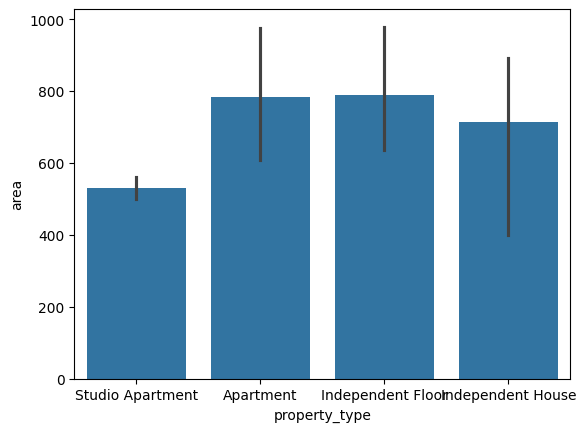

In [3]:
#plot the graph of property_type on the basis of area
sns.barplot(y='area',x='property_type',data=csv.head(20))

In [4]:
#program to price of house in floot value using pandas
csv['price']=csv['price'].str.replace(',','').astype(float)
csv['price']

0         9999.0
1        18500.0
2        13000.0
3        10000.0
4        13500.0
          ...   
33495     9500.0
33496     6500.0
33497    23800.0
33498    75000.0
33499    10000.0
Name: price, Length: 33500, dtype: float64

In [5]:
df=pd.DataFrame(csv.groupby(by='locality',axis=0)['price'].sum()).reset_index()
df
count=pd.DataFrame(csv['locality'].value_counts()).reset_index()
count.sort_values('locality',ascending=True,inplace=True)
df.sort_values('locality',ascending=True,inplace=True)

df1=df.merge(count, on='locality',how='left')
df1['avg_price'] = df1['price']/df1['count']
df1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6008\3724450381.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df=pd.DataFrame(csv.groupby(by='locality',axis=0)['price'].sum()).reset_index()


,locality,price,count,avg_price
0,48 Sector 22 Road,20000.0,1,20000.000000
1,60 Feet Road,18000.0,2,9000.000000
2,A1 Block Paschim Vihar Delhi,41500.0,2,20750.000000
3,AGCR Enclave,223000.0,10,22300.000000
4,Abul Fazal Enclave Jamia Nagar,468500.0,41,11426.829268
...,...,...,...,...
657,mayur vihar phase 1,5100200.0,321,15888.473520
658,param puri,50000.0,4,12500.000000
659,rohini sector 5,454500.0,29,15672.413793
660,south delhi apartment sector 4,35000.0,1,35000.000000


In [8]:
df=pd.DataFrame(csv.groupby(by=['layout_type','locality'],axis=0)['price'].mean()).reset_index()
df1
count=pd.DataFrame(csv['layout_type'].value_counts()).reset_index()
count
count.sort_values('layout_type',ascending=True,inplace=True)
df1.sort_values('layout_type',ascending=True,inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6008\162724866.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df=pd.DataFrame(csv.groupby(by=['layout_type','locality'],axis=0)['price'].mean()).reset_index()


KeyError: 'layout_type'

In [7]:
#program of price acc. to locality (find avg price with new column)
csv['avg_price'] = csv['locality']/csv['price']
csv

TypeError: unsupported operand type(s) for /: 'str' and 'float'

In [ ]:
#program to plot the graph of locality according furnish type
sns.barplot(y='locality',x='furnish_type',data=csv.head(20))

In [ ]:
#plot graph of bhk according to avg_price with hue_locality
sns.swarmplot(y='layout_type',x='avg_price',hue='locality',data=df1)

In [ ]:
#plot the graph of seller type with property type
sns.violinplot(y='property_type',x='seller_type',data=csv.head(50))

In [ ]:
#plot graph of property_type acc. to bedroom
sns.boxplot(y='bedroom',x='property_type',data=csv.head(50))

In [ ]:
#plot graph of property_type acc. to count of furnish type
sns.barplot(y='property_type',x='furnish_type',data=csv.head(50))